## How do data skills trend overtime?

Methodology:
1. Aggregate Skill counts monthly
2. Convert Skill Counts to Percentage of total jobs
3. Plot monthly skill demand

In [40]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
import ast

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Clean Up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)

In [146]:
#` Filter Data for Data Analyst Jobs`
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') &
           (df['job_country'] == 'United States')].copy()
df_DA_US.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."


In [147]:
# Data Prep
df_DA_US['month_num'] = df_DA_US['job_posted_date'].dt.month
df_exploded = df_DA_US.explode('job_skills').dropna(subset=['job_skills'])

In [148]:
top_5_skills = df_exploded['job_skills'].value_counts().head(5).index.tolist()
top_5_skills

['sql', 'excel', 'tableau', 'python', 'sas']

In [160]:
df_pivot = df_exploded.pivot_table(index ='month_num', columns='job_skills',  aggfunc='size', fill_value=0)

In [161]:
df_pivot = df_pivot[top_5_skills]

In [162]:
df_pivot

job_skills,sql,excel,tableau,python,sas
month_num,,,,,
1,4601,3592,2488,2254,1832
2,3168,2587,1676,1618,1212
3,3226,2661,1804,1683,1238
4,3220,2549,1789,1679,1302
5,2581,2118,1432,1349,972
6,2862,2382,1628,1609,984
7,2609,2118,1533,1438,996
8,3414,2731,1951,2025,1276
9,2295,1801,1353,1229,856


In [163]:
monthly_counts = df_DA_US.groupby('month_num').size()
monthly_counts

month_num
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [164]:
df_percent = df_pivot.div(monthly_counts, axis=0) * 100
df_percent = df_percent.round(2)


In [154]:
df_percent

job_skills,sql,excel,tableau,python,sas
month_num,,,,,
1,54.17,42.29,29.29,26.54,21.57
2,51.73,42.24,27.37,26.42,19.79
3,51.88,42.80,29.01,27.07,19.91
4,53.23,42.14,29.58,27.76,21.52
5,51.69,42.42,28.68,27.02,19.47
6,50.36,41.91,28.65,28.31,17.31
7,50.16,40.72,29.48,27.65,19.15
8,51.46,41.17,29.41,30.52,19.23
9,49.47,38.82,29.17,26.49,18.45


In [165]:
df_percent.reset_index(inplace=True)
df_percent['job_posted_month'] = df_percent['month_num'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b')).copy()

df_percent.drop(columns='month_num', inplace=True)

In [166]:
df_percent.set_index('job_posted_month', inplace=True)
df_percent

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.17,42.29,29.29,26.54,21.57
Feb,51.73,42.24,27.37,26.42,19.79
Mar,51.88,42.80,29.01,27.07,19.91
Apr,53.23,42.14,29.58,27.76,21.52
May,51.69,42.42,28.68,27.02,19.47
Jun,50.36,41.91,28.65,28.31,17.31
Jul,50.16,40.72,29.48,27.65,19.15
Aug,51.46,41.17,29.41,30.52,19.23
Sep,49.47,38.82,29.17,26.49,18.45


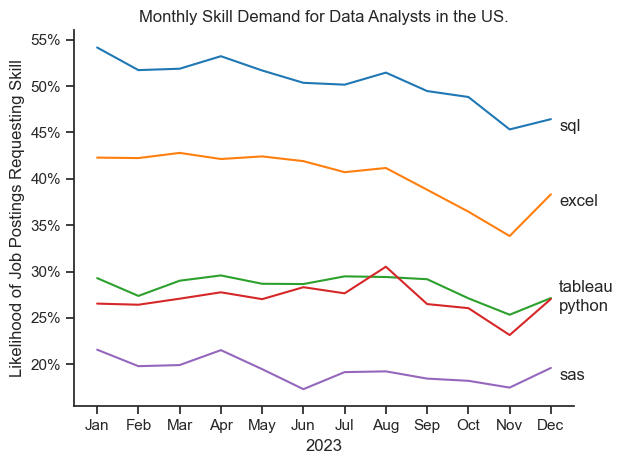

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='ticks')

sns.lineplot(data=df_percent, dashes=False, palette='tab10')

plt.xlabel('2023')
plt.ylabel('Likelihood of Job Postings Requesting Skill')
plt.title('Monthly Skill Demand for Data Analysts in the US.')
plt.legend().remove()
sns.despine()

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
for skill in top_5_skills:
    if skill == 'tableau':
        plt.text(x=11.2, y=df_percent[skill].iloc[-1] + 2, s= skill, ha='left', va='top')
    else:
        plt.text(x=11.2, y=df_percent[skill].iloc[-1], s=skill, ha='left', va='top')


plt.tight_layout()
plt.show()